# Importing the Libraries

In [1]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Data Preparation and Cleaning

# Ingesting the file

In [2]:
restaurants=pd.read_csv('Restaurant names and Metadata.csv')
restaurants.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


# Checking upon the Data Types, and converting them into the required format

In [3]:
restaurants.dtypes

Name           object
Links          object
Cost           object
Collections    object
Cuisines       object
Timings        object
dtype: object

In [4]:
restaurants['Cost']=pd.to_numeric(restaurants['Cost'].str.replace(',',''))
restaurants.dtypes

Name           object
Links          object
Cost            int64
Collections    object
Cuisines       object
Timings        object
dtype: object

# Identifying the nulls- Scope of Cleaning

In [5]:
restaurants.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

# Reading the second data set

In [6]:
review=pd.read_csv('Restaurant reviews.csv')
review.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


# Identifying the data types in the second dataset

In [7]:
review.dtypes

Restaurant    object
Reviewer      object
Review        object
Rating        object
Metadata      object
Time          object
Pictures       int64
dtype: object

# Counting the number of null values

In [8]:
review.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

# Removing the entries with null- To obtain the data that we will use for the analysis

In [9]:
review.dropna(inplace=True)
review.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

# Identifying an invalid entry in Rating Sections

In [10]:
review[review['Rating']=='Like']

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
7601,The Old Madras Baking Company,Dhanasekar Kannan,One of the best pizzas to try. It served with ...,Like,"12 Reviews , 21 Followers",5/18/2019 12:31,1


# Removing the Invalid entry from Rating Colum

In [11]:
review=review[review['Rating']!='Like']
review[review['Rating']=='Like']

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures


The Entry is removed

# Transforming the columns as per requirement- and finally checking the data types

In [12]:
review['Rating']=pd.to_numeric(review['Rating'])
review['Reviews'],review['Followers']=review['Metadata'].str.split(',').str
review['Reviews']=pd.to_numeric(review['Reviews'].str.split(' ').str[0])
review['Followers']=pd.to_numeric(review['Followers'].str.split(' ').str[1])
review['Time']=pd.to_datetime(review['Time'])
review=review.loc[:,['Restaurant','Reviewer','Review','Rating','Reviews','Followers','Time','Pictures']]
review.dtypes

Restaurant            object
Reviewer              object
Review                object
Rating               float64
Reviews                int64
Followers            float64
Time          datetime64[ns]
Pictures               int64
dtype: object



# The Analysis-

# Cuisines at Restaurants in Hyderabad

The Top 10 Cuisines are:
               Counts of Restaurants
North Indian                     61
Chinese                          43
Continental                      21
Biryani                          16
Fast Food                        15
Asian                            15
Italian                          14
Desserts                         13
South Indian                      9
Bakery                            7


Text(0.5, 1.0, 'Cuisines at Restaurants in Hyderabad (in order of Popularity)')

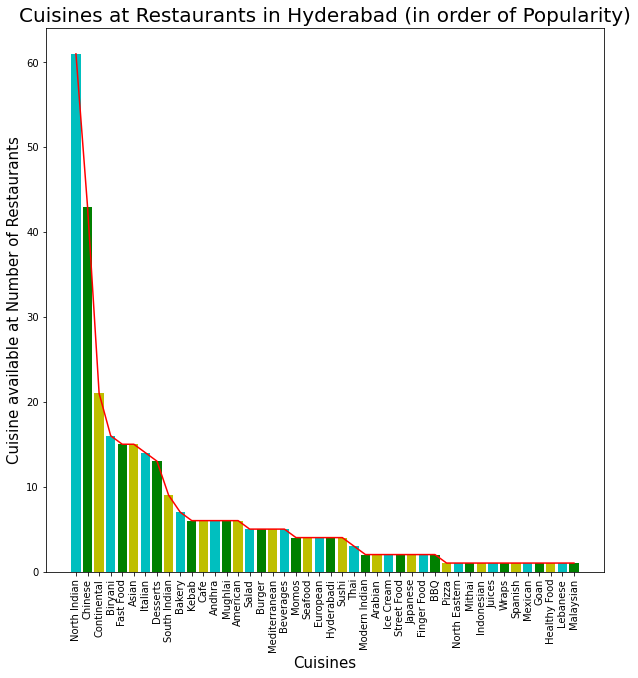

In [13]:
cuisine_list=restaurants.Cuisines.str.split(', ')
cuis={}
for i in cuisine_list:
    for j in i:
        if (j in cuis):
            cuis[j]+=1
        else:
            cuis[j]=1
cuis_df=pd.DataFrame(cuis.values(),index=cuis.keys(),columns={'Counts of Restaurants'})
cuis_df.sort_values(by='Counts of Restaurants',ascending=False,inplace=True)
top_10_cuis=cuis_df[0:10]
print('The Top 10 Cuisines are:\n',top_10_cuis)
top_10_cuis.reset_index()
plt.figure(figsize=(10,10))
plt.plot(cuis_df.index,cuis_df['Counts of Restaurants'],color='r')
plt.bar(cuis_df.index,cuis_df['Counts of Restaurants'],color='cgy')
plt.xlabel('Cuisines',size=15)
plt.xticks(rotation=90)
plt.ylabel('Cuisine available at Number of Restaurants',size=15)
plt.title('Cuisines at Restaurants in Hyderabad (in order of Popularity)',size=20)

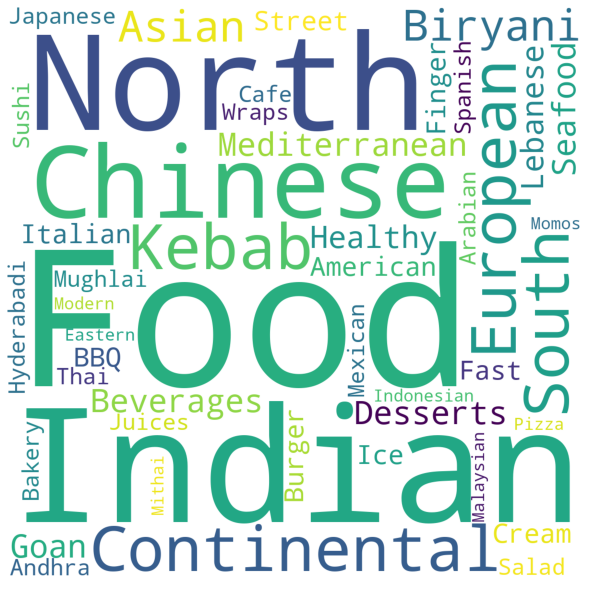

In [14]:
word_list=cuis.keys()
strr=''
for i in word_list:
    strr=strr+i+' '
wordcloud = WordCloud(width = 1200, height = 1200, 
                background_color ='white',  
                min_font_size = 12).generate(strr) 
plt.figure(figsize = (8, 8), facecolor = 'white') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

# Restaurant wise Cost in Hyderabad

The Analysis upon 105 restaurants show- The Average Cost at a Restaurant in Hyderabad is ₹861.4285714285714
---------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------
The Top 5 Costliest Restaurants of Hyderabad are:

                                                 Name    Cost
23               Collage - Hyatt Hyderabad Gachibowli  2800.0
35                   Feast - Sheraton Hyderabad Hotel  2500.0
0                                   10 Downing Street  1900.0
48  Jonathan's Kitchen - Holiday Inn Express & Suites  1900.0
20            Cascade - Radisson Hyderabad Hitec City  1800.0
---------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------
The Top 5 Cheapest Re

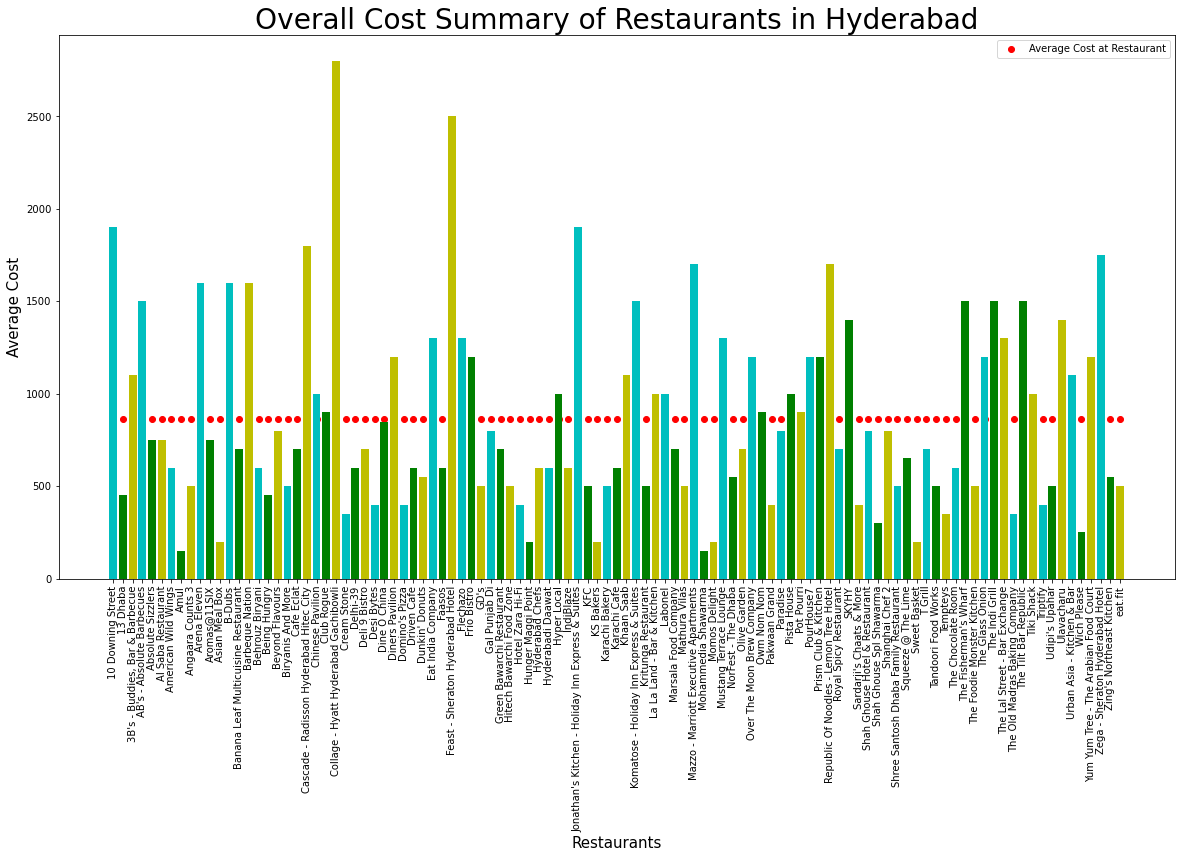

In [15]:
rest_cost=restaurants.groupby('Name').apply(lambda x:np.average(x['Cost'])).reset_index(name='Cost')
avg=np.average(rest_cost['Cost'])

plt.figure(figsize=(20,10))
plt.bar(rest_cost['Name'],rest_cost['Cost'],color='cgy')
for i in rest_cost['Name']:
    plt.scatter(i,avg,color='r')
plt.xlabel('Restaurants',size=15)
plt.xticks(rotation=90)
plt.ylabel('Average Cost',size=15)
plt.title('Overall Cost Summary of Restaurants in Hyderabad',size=28)
plt.legend(['Average Cost at Restaurant'])
rest_cost.sort_values(by='Cost',ascending=False,inplace=True)
print('The Analysis upon {} restaurants show- The Average Cost at a Restaurant in Hyderabad is ₹{}'.format(len(rest_cost),avg))
print('---------------------------------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------------------------------')
print('The Top 5 Costliest Restaurants of Hyderabad are:\n')
print(rest_cost[:5])
print('---------------------------------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------------------------------')
print('The Top 5 Cheapest Restaurants of Hyderabad are:\n')
print(rest_cost[-5:])
print('---------------------------------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------------------------------')

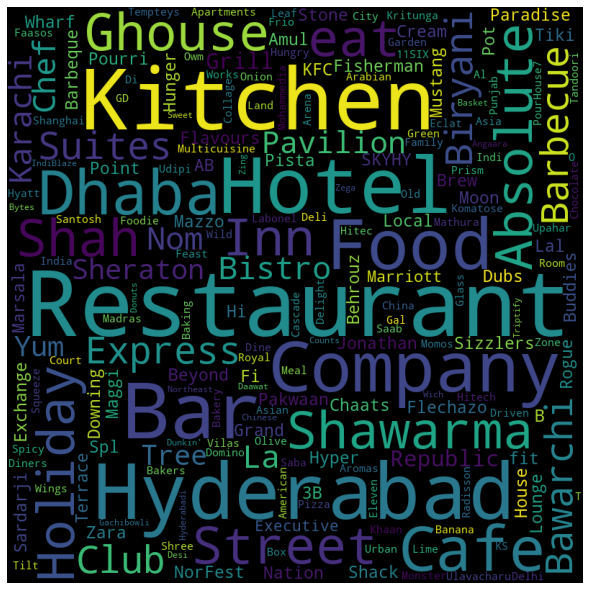

In [16]:
rests=restaurants.Name.unique()
rest_str=''
for i in rests:
    rest_str=rest_str+i+' '
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black',  
                min_font_size = 10).generate(rest_str) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

# Checking upon the Total number of Restaurants whose reviews are available

In [17]:
review.Restaurant.nunique()

100

# Identifying the Reviewers who have submitted the highest number of reviews (Top 15)- as well as the review submission distribution curve

A total of 7442 users have sumbitted a review- with each user submitting at an average of 1.3375436710561677 reviews
----------The Top 15 Users who have submitted the most reviews------------
                            Reviewer  Review Count
654                           Ankita            13
3855                     Parijat Ray            13
2652                           Kiran            12
7009                    Vedant Killa            11
2311                       Jay Mehta            11
3131           Manojkumar D Nambisan            10
6126                         Sravani            10
5954                      Siva Kumar            10
4256                        Priyanka            10
264   Age Of Foodies (Suraj Karambe)            10
4130                 Prasun Gokhlani             9
3998               Prachita Jayaswal             9
3694                           Nillu             9
2642                 Khushboo Pandey             9
7172                           Vinay       

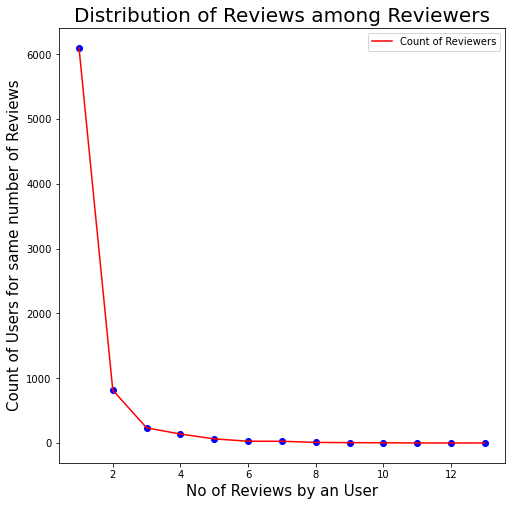

In [18]:
top_reviewer=review.groupby('Reviewer').apply(lambda x:x['Reviewer'].count()).reset_index(name='Review Count')
top_reviewer=top_reviewer.sort_values(by='Review Count',ascending=False)
print('A total of {} users have sumbitted a review- with each user submitting at an average of {} reviews'.format(review.Reviewer.nunique(),np.average(review.Reviewer.value_counts())))
print('----------The Top 15 Users who have submitted the most reviews------------')
print(top_reviewer[:15])
top_reviewer_count=top_reviewer.groupby('Review Count').apply(lambda x:x['Review Count'].count()).reset_index(name='Counts')
plt.figure(figsize=(8,8))
plt.plot(top_reviewer_count['Review Count'],top_reviewer_count['Counts'],color='r')
plt.scatter(top_reviewer_count['Review Count'],top_reviewer_count['Counts'],color='b')
plt.xlabel('No of Reviews by an User',size=15)
plt.ylabel('Count of Users for same number of Reviews',size=15)
plt.title('Distribution of Reviews among Reviewers',size=20)
plt.legend(['Count of Reviewers'])

A total of 7442 users have sumbitted a rating- with an average rating of-> 3.578301536992077 
----------Ratings submitted by the Top 15 Users------------
                          Reviewer  Review Count  Average Ratings
0                           Ankita            13         3.923077
1                      Parijat Ray            13         3.192308
2                            Kiran            12         4.500000
3                     Vedant Killa            11         4.000000
4                        Jay Mehta            11         3.727273
5            Manojkumar D Nambisan            10         3.700000
6                          Sravani            10         4.000000
7                       Siva Kumar            10         3.600000
8                         Priyanka            10         2.600000
9   Age Of Foodies (Suraj Karambe)            10         3.500000
10                 Prasun Gokhlani             9         4.000000
11               Prachita Jayaswal             9      

Text(0.5, 1.0, 'Average Ratings per Review Submitted Distribution')

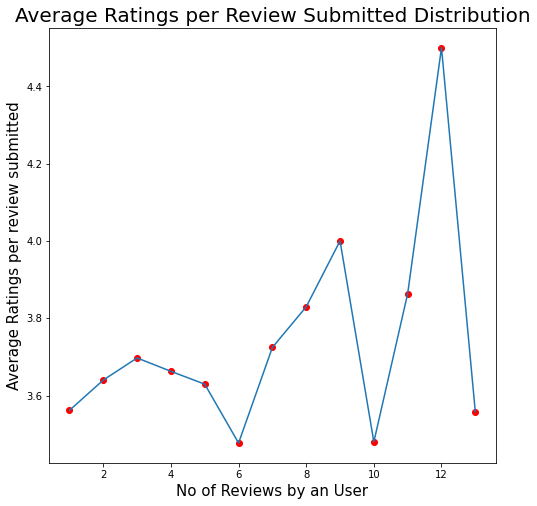

In [19]:
review_ratings=review.groupby('Reviewer').apply(lambda x:np.average(x['Rating'])).reset_index(name='Average Ratings')
print('A total of {} users have sumbitted a rating- with an average rating of-> {} '.format(review.Reviewer.nunique(),np.average(review_ratings['Average Ratings'])))
review_ratings=pd.merge(top_reviewer,review_ratings,how='inner',left_on='Reviewer',right_on='Reviewer')
top_reviewers=review_ratings[:15]
print('----------Ratings submitted by the Top 15 Users------------')
print(top_reviewers)
review_ratings_plot=review_ratings.groupby('Review Count').apply(lambda x:np.average(x['Average Ratings'])).reset_index(name='Average')
plt.figure(figsize=(8,8))
plt.plot(review_ratings_plot['Review Count'],review_ratings_plot['Average'])
plt.scatter(review_ratings_plot['Review Count'],review_ratings_plot['Average'],color='r')
plt.xlabel('No of Reviews by an User',size=15)
plt.ylabel('Average Ratings per review submitted',size=15)
plt.title('Average Ratings per Review Submitted Distribution',size=20)


# Identifying the Rating pattern of the Top Reviwerers by Restaurants

Text(0.5, 1.0, 'Ratings of the Restaurants by the Top Reviewers')

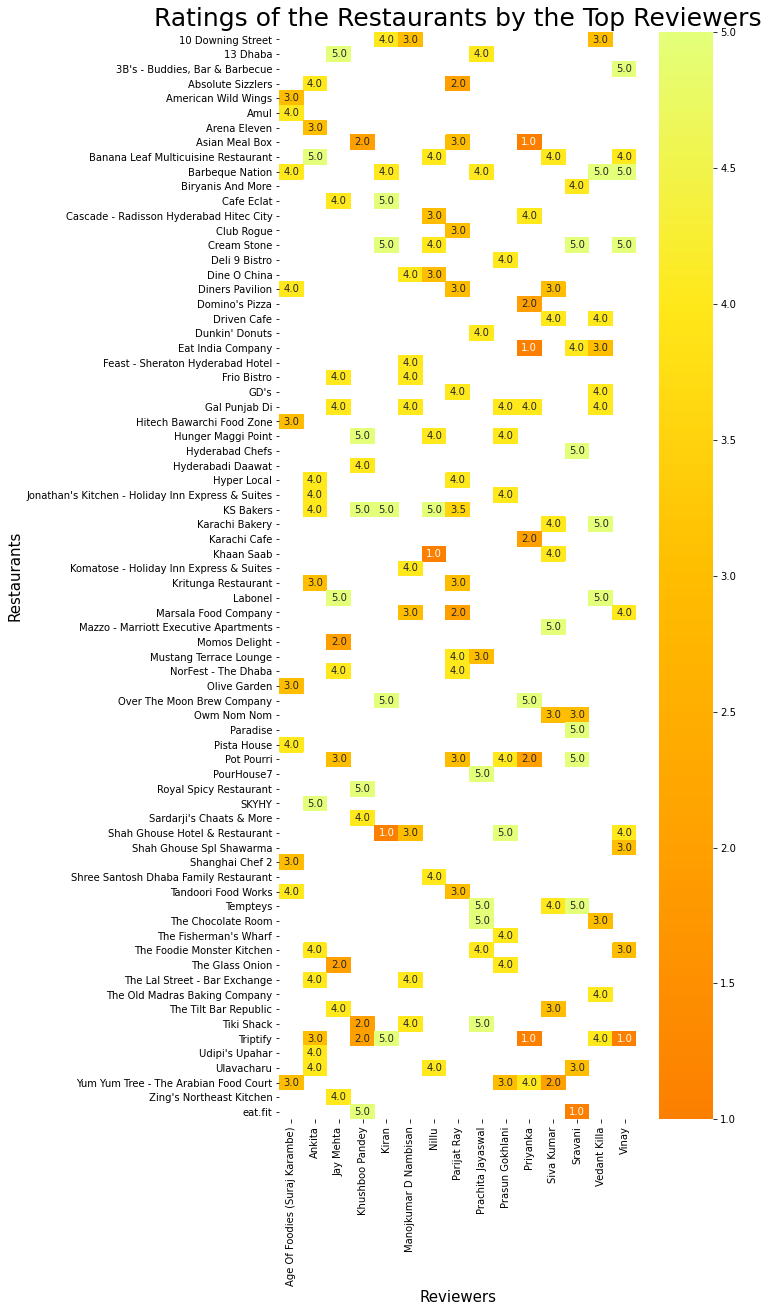

In [20]:
top_reviews=pd.merge(top_reviewers,review,how='inner',left_on='Reviewer',right_on='Reviewer')
top_reviews_avg=top_reviews.groupby(['Reviewer','Restaurant']).apply(lambda x:np.average(x['Rating'])).reset_index(name='Average Ratings')
rating_pivot=pd.pivot(top_reviews_avg,values='Average Ratings',index='Restaurant',columns='Reviewer')
rating_pivot.replace(np.NaN,0)
plt.figure(figsize=(8,20))
sns.heatmap(rating_pivot,annot=True,fmt='.1f',cmap='Wistia_r')
plt.xlabel('Reviewers',size=15)
plt.ylabel('Restaurants',size=15)
plt.title('Ratings of the Restaurants by the Top Reviewers',size=25)



# Reviewer/Follower varitation with time

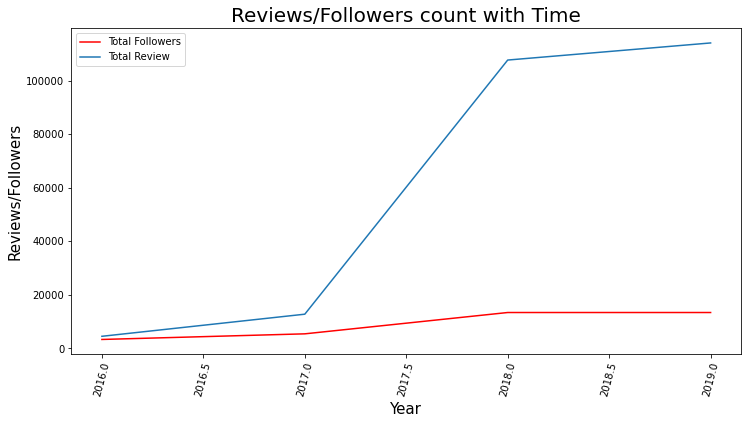

In [21]:
review['Year'] = pd.DatetimeIndex(review['Time']).year
review_follow_1=review.groupby('Year').apply(lambda x:np.sum(x['Reviews'])).reset_index(name='Total Reviews')
review_follow_2=review.groupby('Year').apply(lambda x:np.max(x['Followers'])).reset_index(name='Total Followers')
review_follow=pd.merge(review_follow_1,review_follow_2,how='inner',left_on='Year',right_on='Year')
plt.figure(figsize=(12,6))
plt.plot(review_follow['Year'],review_follow['Total Followers'],color='r')
plt.plot(review_follow['Year'],review_follow['Total Reviews'])
plt.xlabel('Year',size=15)
plt.xticks(rotation=75)
plt.ylabel('Reviews/Followers',size=15)
plt.title('Reviews/Followers count with Time',size=20)
plt.legend(['Total Followers','Total Review'])



# Average Rating of the Restaurants- Overall

The Analysis upon 100 restaurants show- The Average Ratings for Restaurants in Hyderabad is 3.6018905398523047
----------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------
The 5 Best Rated Restaurants are:
                         Restaurant  Average Ratings
3        AB's - Absolute Barbecues             4.88
11                          B-Dubs             4.81
2   3B's - Buddies, Bar & Barbecue             4.76
67                        Paradise             4.70
35                        Flechazo             4.66
----------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------
The 5 Worst Rated Restaurants are:
           Restaurant  Average Ratings
14   Behrouz Bir

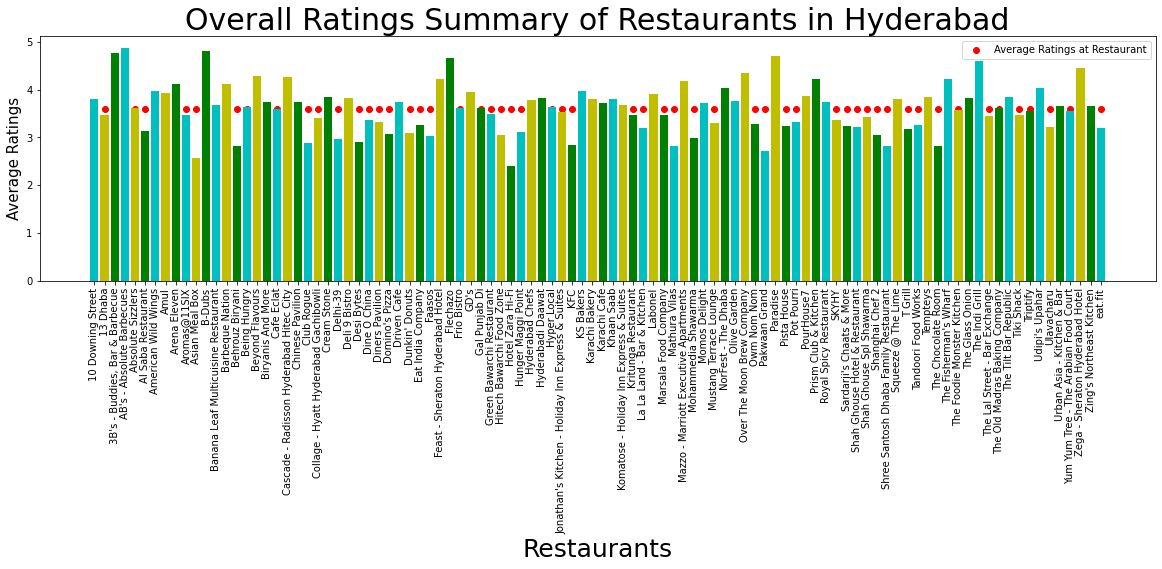

In [22]:
rats=review.groupby("Restaurant").apply(lambda x:np.average(x['Rating'])).reset_index(name='Average Ratings')
avg=np.average(rats['Average Ratings'])
plt.figure(figsize=(20,4.5))
plt.bar(rats["Restaurant"],rats['Average Ratings'],color='cyg')
for i in rats["Restaurant"]:
    plt.scatter(i,avg,color='r')
plt.xlabel('Restaurants',size=25)
plt.xticks(rotation=90)
plt.ylabel('Average Ratings',size=15)
plt.title('Overall Ratings Summary of Restaurants in Hyderabad',size=30)
plt.legend(['Average Ratings at Restaurant'])
rats.sort_values(by='Average Ratings',ascending=False,inplace=True)
print('The Analysis upon {} restaurants show- The Average Ratings for Restaurants in Hyderabad is {}'.format(len(rats),avg))
print('----------------------------------------------------------------------------------------------------------------')
print('----------------------------------------------------------------------------------------------------------------')
print('The 5 Best Rated Restaurants are:\n',rats[:5])
print('----------------------------------------------------------------------------------------------------------------')
print('----------------------------------------------------------------------------------------------------------------')
print('The 5 Worst Rated Restaurants are:\n',rats[-5:])
print('----------------------------------------------------------------------------------------------------------------')
print('----------------------------------------------------------------------------------------------------------------')



# Average Ratings of Restaurants over the Years

Text(0.5, 1.0, 'Restaurants Ratings over the Years')

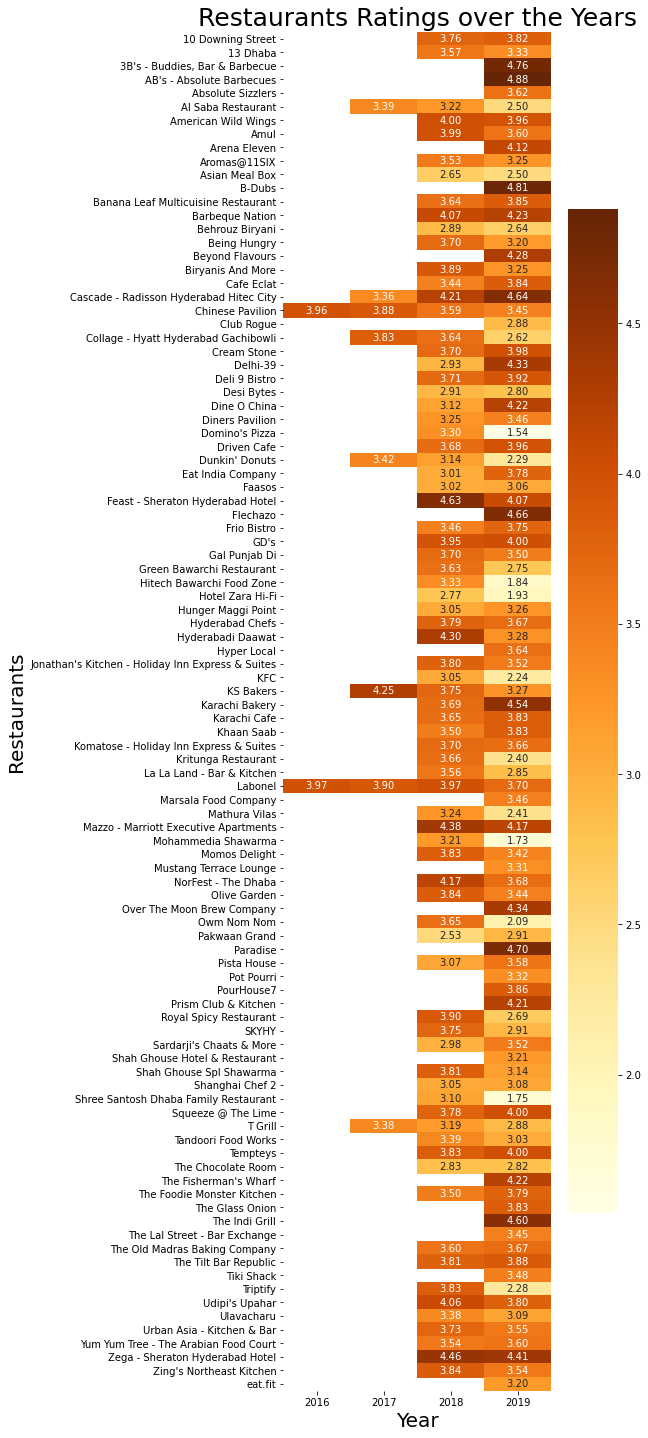

In [23]:
rest_time_rev=review.groupby(['Restaurant','Year']).apply(lambda x:np.average(x['Rating'])).reset_index(name='Average Overall Score')
heatmap_df=pd.pivot(rest_time_rev,values='Average Overall Score',index='Restaurant',columns='Year')
plt.figure(figsize=(6,25))
sns.heatmap(heatmap_df,annot=True,fmt='.2f',cmap='YlOrBr')
plt.xlabel('Year',size=20)
plt.ylabel('Restaurants',size=20)
plt.title('Restaurants Ratings over the Years',size=25)



# Distributing the words in the reviews submitted by the Reviewers¶

**PS.** Removing the punctuation marks first- In order to ease the process of sp,itting the words. Also all the words are converetd into lower case for easily comparing them.

In [24]:
def word_req(strr):
    strs=''
    punctutations=[',','!','@','"',"'",'(',')','/','-','*','$',':',';','#','%','&']
    breaks=['\n','.']
    strr1=strr.lower()
    for i in strr1:
        for j in i:
            if j in punctutations:
                continue 
            elif j in breaks:
                strs=strs+' '
            else:
                strs=strs+j
    return strs

In [25]:
review_list=review.groupby('Review').apply(lambda x:word_req(x['Review'].str).split()).reset_index(name='Words List')
merged_review=pd.merge(review,review_list,how='inner',left_on='Review',right_on='Review')
merged_review

,Restaurant,Reviewer,Review,Rating,Reviews,Followers,Time,Pictures,Year,Words List
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,1,2.0,2019-05-25 15:54:00,0,2019,"[the, ambience, was, good, food, was, quite, g..."
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,3,2.0,2019-05-25 14:20:00,0,2019,"[ambience, is, too, good, for, a, pleasant, ev..."
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2,3.0,2019-05-24 22:54:00,0,2019,"[a, must, try, great, food, great, ambience, t..."
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,1,1.0,2019-05-24 22:11:00,0,2019,"[soumen, das, and, arun, was, a, great, guy, o..."
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,3,2.0,2019-05-24 21:37:00,0,2019,"[food, is, good, we, ordered, kodi, drumsticks..."
...,...,...,...,...,...,...,...,...,...,...
9949,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,53,54.0,2016-06-05 00:08:00,0,2016,"[madhumathi, mahajan, well, to, start, with, n..."
9950,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,2,53.0,2016-06-04 22:01:00,0,2016,"[this, place, has, never, disappointed, us, th..."
9951,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,65,423.0,2016-06-03 10:37:00,3,2016,"[bad, rating, is, mainly, because, of, chicken..."
9952,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,13,144.0,2016-05-31 17:22:00,0,2016,"[i, personally, love, and, prefer, chinese, fo..."


# Identifying the relationship of Pictures in Reviews with the Time

Text(0.5, 1.0, 'Picture Count in Reviews with Time')

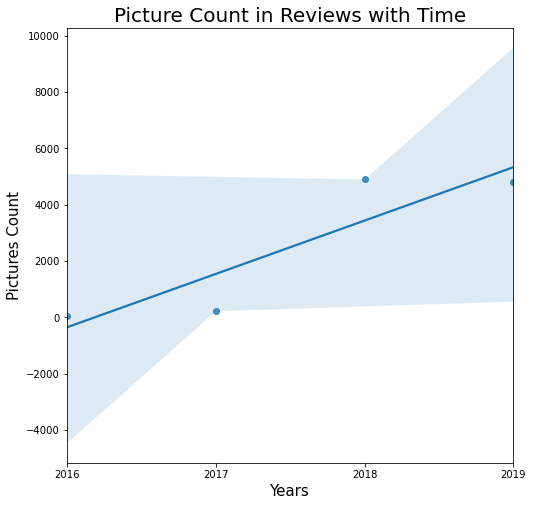

In [26]:
pic_yr=merged_review.groupby('Year').apply(lambda x:x['Pictures'].count()).reset_index(name='Pic Count')
plt.figure(figsize=(8,8))
sns.regplot(pic_yr['Year'],pic_yr['Pic Count'])
plt.xlabel('Years',size=15)
plt.xticks(np.arange(np.min(pic_yr['Year']),np.max(pic_yr['Year'])+1))
plt.ylabel('Pictures Count',size=15)
plt.title('Picture Count in Reviews with Time',size=20)


# Identifying the most common words in the reviews

Text(0.5, 1.0, 'Most Popular Keywords in Zomato Reviews in Hyderabad')

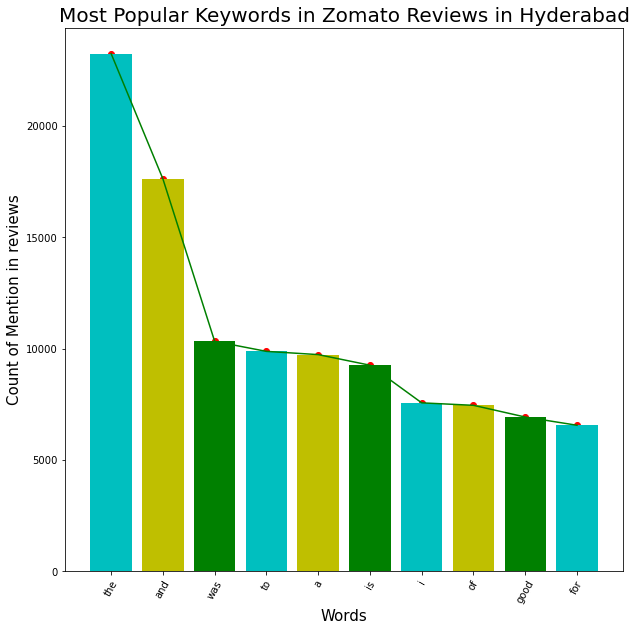

In [27]:
words_list=merged_review['Words List']
reviews={}
for i in words_list:
    for j in i:
        if (j in reviews):
            reviews[j]+=1
        else:
            reviews[j]=1
reviews_df=pd.DataFrame(reviews.values(),index=reviews.keys(),columns={'Counts'})
sorted_reviews_df=reviews_df.sort_values(by='Counts',ascending=False)
top_10_reviews=sorted_reviews_df[0:10]
top_10_reviews.reset_index()
plt.figure(figsize=(10,10))
plt.plot(top_10_reviews.index,top_10_reviews.Counts,color='g')
plt.bar(top_10_reviews.index,top_10_reviews.Counts,color='cyg')
plt.scatter(top_10_reviews.index,top_10_reviews.Counts,color='r')
plt.xlabel('Words',size=15)
plt.xticks(rotation=60)
plt.ylabel('Count of Mention in reviews',size=15)
plt.title('Most Popular Keywords in Zomato Reviews in Hyderabad',size=20)



# Creating a word distribution ignoring grammartical add-ons in a statement

Text(0.5, 1.0, 'Most Popular Keywords in Zomato Reviews in Hyderabad')

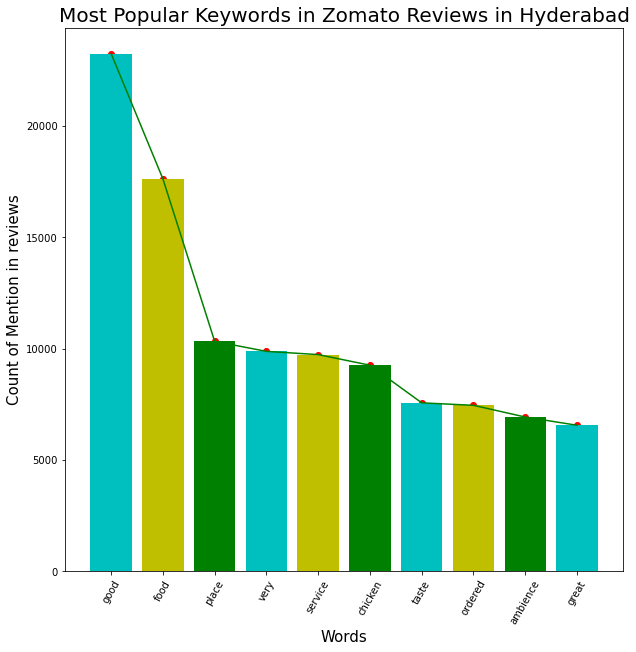

In [28]:
articles=['the','a','an']
preposition=['in','on','at','to','for','from','of','with','since','too','by','it','this','that']
conjunction=['and','but','as','also','or','not']
verb=['is','was','are','were','have','had']
noun=['i','we','us','my','he','she','they','you','all']
stop_words=pd.read_fwf('stop.txt')
modified_reviews=[]
for i in reviews:
    if (i in articles or i in preposition or i in conjunction or i in verb or i in noun or i in stop_words):
        continue
    else:
        modified_reviews.append(i)
modified_reviews_df=pd.DataFrame(index=modified_reviews)
modified_word_list=pd.merge(reviews_df,modified_reviews_df,how='inner',left_index=True,right_index=True)
modified_word_list_sort=modified_word_list.sort_values(by='Counts',ascending=False)
modified_word_list_top10=modified_word_list_sort[:10]
plt.figure(figsize=(10,10))
plt.plot(modified_word_list_top10.index,top_10_reviews.Counts,color='g')
plt.bar(modified_word_list_top10.index,top_10_reviews.Counts,color='cyg')
plt.scatter(modified_word_list_top10.index,top_10_reviews.Counts,color='r')
plt.xlabel('Words',size=15)
plt.xticks(rotation=60)
plt.ylabel('Count of Mention in reviews',size=15)
plt.title('Most Popular Keywords in Zomato Reviews in Hyderabad',size=20)



# Creating a Word Cloud with the most common words in the Reviews

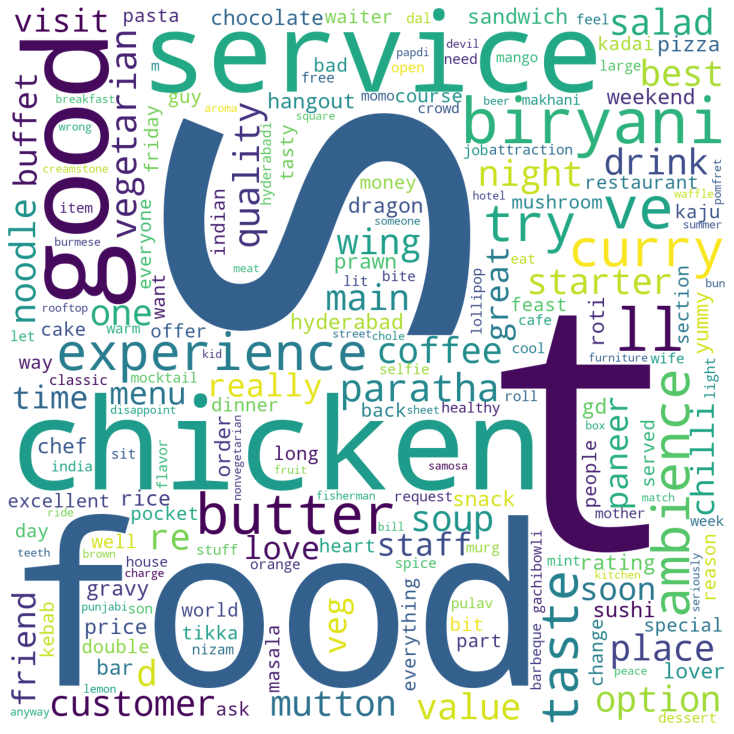

In [29]:
review_str=''
for i in modified_reviews:
    review_str=review_str+i+' '
wordcloud = WordCloud(width = 1200, height = 1200, 
                background_color ='white',  
                min_font_size = 10).generate(review_str) 
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

# Preparing the Sentiment Analysis Words Dataset

# Ingesting the Positive and Negative words for the analysis

In [30]:
positive_df=pd.read_fwf('pos.txt')
negative_df=pd.read_fwf('neg.txt')
positive_words=positive_df['a+'].tolist()
negative_words=negative_df['S2-faced'].tolist()

# Creating the function for returning the number of positive words in each review

In [31]:
def pos_count(word_list):
    pos_tot_count=0
    for i in word_list:
        if i in positive_words:
            pos_tot_count=pos_tot_count+1
        else:
            continue
    return pos_tot_count
p_no=0
pos_dict={}
for i in merged_review['Words List']:
    num=pos_count(i)
    pos_dict[p_no]=num
    p_no+=1
positive_review_df=pd.DataFrame(pos_dict.values(),index=pos_dict.keys(),columns={'Positive_Count'})

# Creating the function for returning the number of negative words in each review

In [32]:
def neg_count(word_list):
    neg_tot_count=0
    for i in word_list:
        if i in negative_words:
            neg_tot_count=neg_tot_count+1
        else:
            continue
    return neg_tot_count
n_no=0
neg_dict={}
for i in merged_review['Words List']:
    num=neg_count(i)
    neg_dict[n_no]=num
    n_no+=1
negative_review_df=pd.DataFrame(neg_dict.values(),index=neg_dict.keys(),columns={'Negative_Count'})

In [33]:
review_df=pd.merge(positive_review_df,negative_review_df,how='outer',left_index=True,right_index=True)
review_df['Overall Score']=review_df['Positive_Count']-review_df['Negative_Count']
merged_review_df=pd.merge(merged_review,review_df,how='inner',left_index=True,right_index=True)
merged_review_df

,Restaurant,Reviewer,Review,Rating,Reviews,Followers,Time,Pictures,Year,Words List,Positive_Count,Negative_Count,Overall Score
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,1,2.0,2019-05-25 15:54:00,0,2019,"[the, ambience, was, good, food, was, quite, g...",6,1,5
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,3,2.0,2019-05-25 14:20:00,0,2019,"[ambience, is, too, good, for, a, pleasant, ev...",6,0,6
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2,3.0,2019-05-24 22:54:00,0,2019,"[a, must, try, great, food, great, ambience, t...",4,0,4
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,1,1.0,2019-05-24 22:11:00,0,2019,"[soumen, das, and, arun, was, a, great, guy, o...",3,0,3
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,3,2.0,2019-05-24 21:37:00,0,2019,"[food, is, good, we, ordered, kodi, drumsticks...",5,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9949,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,53,54.0,2016-06-05 00:08:00,0,2016,"[madhumathi, mahajan, well, to, start, with, n...",16,3,13
9950,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,2,53.0,2016-06-04 22:01:00,0,2016,"[this, place, has, never, disappointed, us, th...",5,2,3
9951,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,65,423.0,2016-06-03 10:37:00,3,2016,"[bad, rating, is, mainly, because, of, chicken...",16,7,9
9952,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,13,144.0,2016-05-31 17:22:00,0,2016,"[i, personally, love, and, prefer, chinese, fo...",6,2,4


# Restaurants with the Best and the worst reviews

In [34]:
rest_score=merged_review_df.groupby('Restaurant').apply(lambda x:np.average(x['Overall Score'])).reset_index(name='Average Overall Score')
rest_count=merged_review_df.groupby('Restaurant').apply(lambda x:x['Restaurant'].count()).reset_index(name='# Reviews')
rest_count_req=rest_count[rest_count['# Reviews']>=50]
rest_count_review=pd.merge(rest_count_req,rest_score,how='inner',left_on='Restaurant',right_on='Restaurant')
rest_count_review_sort_asc=rest_count_review.sort_values(by='Average Overall Score')
rest_count_review_sort_desc=rest_count_review.sort_values(by='Average Overall Score',ascending=False)
print('The Restaurants with the Best Overall Ratings: \n')
print('------------------------------------------------------------------------------------------')
print(rest_count_review_sort_desc[:10])
print('------------------------------------------------------------------------------------------')
print('------------------------------------------------------------------------------------------')
print('\n The Restaurants with the Worst Overall Ratings: \n')
print('------------------------------------------------------------------------------------------')
print(rest_count_review_sort_asc[:10])
print('------------------------------------------------------------------------------------------')
print('------------------------------------------------------------------------------------------')

The Restaurants with the Best Overall Ratings: 

------------------------------------------------------------------------------------------
                                           Restaurant  # Reviews  \
70                                         PourHouse7        100   
58              Mazzo - Marriott Executive Apartments        100   
44                                  Hyderabadi Daawat        100   
46  Jonathan's Kitchen - Holiday Inn Express & Suites        100   
19            Cascade - Radisson Hyderabad Hitec City        100   
97                    Zega - Sheraton Hyderabad Hotel        100   
86                                    The Glass Onion        100   
8                                        Arena Eleven         85   
6                                 American Wild Wings         77   
87                                     The Indi Grill        100   

    Average Overall Score  
70               6.030000  
58               5.940000  
44               5.830000  



# The Average Score of Review for each Rating Provided

Text(0.5, 1.0, 'Rating vs Overall Review Score Anaysis')

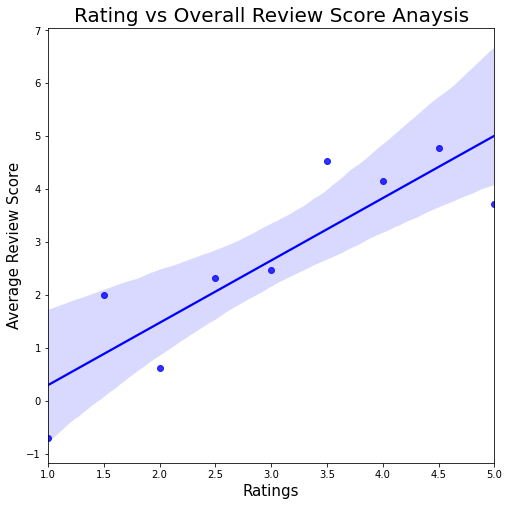

In [35]:
rating_review=merged_review_df.groupby('Rating').apply(lambda x:np.average(x['Overall Score'])).reset_index(name='Average Review Score')
plt.figure(figsize=(8,8))
sns.regplot(rating_review['Rating'],rating_review['Average Review Score'],color='b')
plt.xlabel('Ratings',size=15)
plt.ylabel('Average Review Score',size=15)
plt.title('Rating vs Overall Review Score Anaysis',size=20)

Text(0.5, 1.0, 'Picture vs Overall Review Score Analysis')

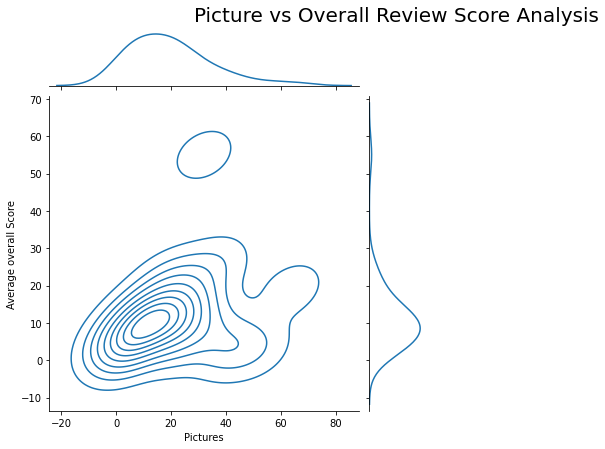

In [36]:


pic_review=merged_review_df.groupby('Pictures').apply(lambda x:np.average(x['Overall Score'])).reset_index(name='Average overall Score')
sns.jointplot(pic_review['Pictures'],pic_review['Average overall Score'],kind='kde')
plt.title('Picture vs Overall Review Score Analysis',size=20,pad=75)



# Positive vs Negative Feedbacks by Year Analysis

Text(0.5, 1.0, 'Positive vs Negative Reviews over the Years')

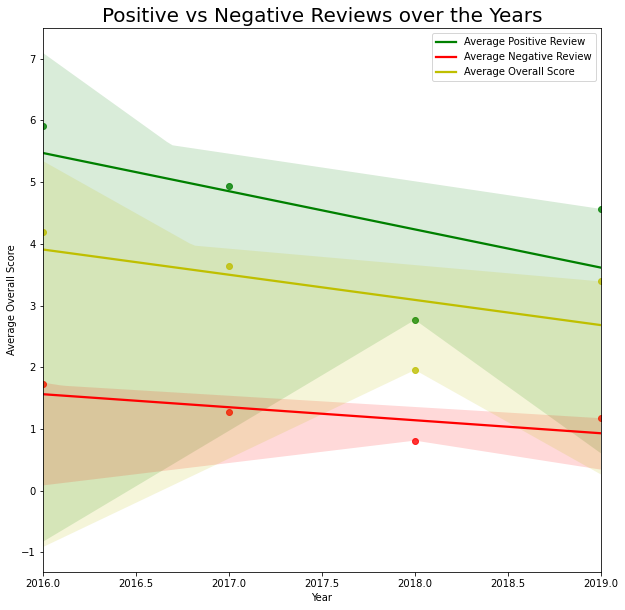

In [37]:
yes_pos_neg_df=merged_review_df[['Restaurant','Year','Positive_Count','Negative_Count','Overall Score']]
plt.figure(figsize=(10,10))
yes_pos_df=yes_pos_neg_df.groupby('Year').apply(lambda x:np.average(x['Positive_Count'])).reset_index(name='Average Positive Review')
yes_neg_df=yes_pos_neg_df.groupby('Year').apply(lambda x:np.average(x['Negative_Count'])).reset_index(name='Average Negative Review')
yes_score_df=yes_pos_neg_df.groupby('Year').apply(lambda x:np.average(x['Overall Score'])).reset_index(name='Average Overall Score')
sns.regplot(yes_pos_df['Year'],yes_pos_df['Average Positive Review'],color='g')
sns.regplot(yes_neg_df['Year'],yes_neg_df['Average Negative Review'],color='r')
sns.regplot(yes_score_df['Year'],yes_score_df['Average Overall Score'],color='y')
plt.legend(['Average Positive Review','Average Negative Review','Average Overall Score'])
plt.title('Positive vs Negative Reviews over the Years',size=20)


# Merging both the Files

In [38]:
restaurants_req=restaurants[['Name','Cost']]
review_final=pd.merge(merged_review_df,restaurants_req,how='inner',left_on='Restaurant',right_on='Name')
review_final

,Restaurant,Reviewer,Review,Rating,Reviews,Followers,Time,Pictures,Year,Words List,Positive_Count,Negative_Count,Overall Score,Name,Cost
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,1,2.0,2019-05-25 15:54:00,0,2019,"[the, ambience, was, good, food, was, quite, g...",6,1,5,Beyond Flavours,800
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,3,2.0,2019-05-25 14:20:00,0,2019,"[ambience, is, too, good, for, a, pleasant, ev...",6,0,6,Beyond Flavours,800
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2,3.0,2019-05-24 22:54:00,0,2019,"[a, must, try, great, food, great, ambience, t...",4,0,4,Beyond Flavours,800
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,1,1.0,2019-05-24 22:11:00,0,2019,"[soumen, das, and, arun, was, a, great, guy, o...",3,0,3,Beyond Flavours,800
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,3,2.0,2019-05-24 21:37:00,0,2019,"[food, is, good, we, ordered, kodi, drumsticks...",5,0,5,Beyond Flavours,800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9949,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,53,54.0,2016-06-05 00:08:00,0,2016,"[madhumathi, mahajan, well, to, start, with, n...",16,3,13,Chinese Pavilion,1000
9950,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,2,53.0,2016-06-04 22:01:00,0,2016,"[this, place, has, never, disappointed, us, th...",5,2,3,Chinese Pavilion,1000
9951,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,65,423.0,2016-06-03 10:37:00,3,2016,"[bad, rating, is, mainly, because, of, chicken...",16,7,9,Chinese Pavilion,1000
9952,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,13,144.0,2016-05-31 17:22:00,0,2016,"[i, personally, love, and, prefer, chinese, fo...",6,2,4,Chinese Pavilion,1000


# Identifying the relationships between:

# 1. Total Cost vs Overall Number of Orders

# 2. Cost vs Ratings Relationship

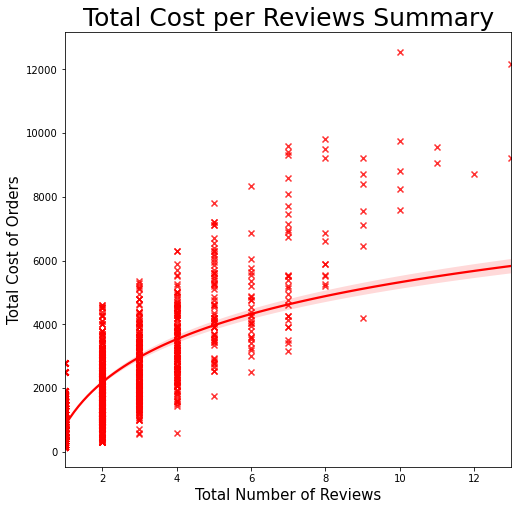

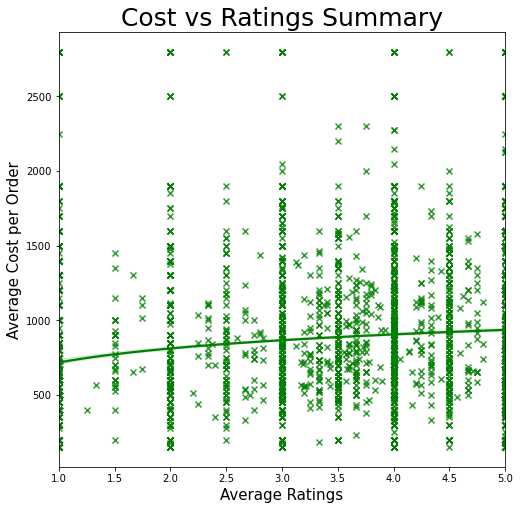

In [39]:
cust_cost=review_final.groupby('Reviewer').apply(lambda x:np.sum(x['Cost'])).reset_index(name='Total Cost')
cust_cost.sort_values(by='Total Cost',ascending=False,inplace=True)
cust_cost_per_order=pd.merge(review_ratings,cust_cost,how='inner',left_on='Reviewer',right_on='Reviewer')
cust_cost_per_order['Average Cost Per Order']=cust_cost_per_order['Total Cost']/cust_cost_per_order['Review Count']
plt.figure(figsize=(8,8))
sns.regplot(cust_cost_per_order['Review Count'],cust_cost_per_order['Total Cost'],marker='x', color='r',logx=True)
plt.xlabel('Total Number of Reviews',size=15)
plt.ylabel('Total Cost of Orders',size=15)
plt.title('Total Cost per Reviews Summary',size=25)
plt.show()
plt.figure(figsize=(8,8))
sns.regplot(cust_cost_per_order['Average Ratings'],cust_cost_per_order['Average Cost Per Order'],marker='x', color='g',logx=True)
plt.xlabel('Average Ratings',size=15)
plt.ylabel('Average Cost per Order',size=15)
plt.title('Cost vs Ratings Summary',size=25)
plt.show()